# Proyecto Final Carrera 04  

#### Análisis de Sentimientos
Quiero colocar etiquetas positivo y negativo de acuerdo a la calificación de estrellas; este clasificador de análisis de sentimiento simple podria ser muy útil ya que no es necesario tanto procesamiento de datos.

## Vamos a manejar el mismo Dataser de la entrega 3

### The Multilingual Amazon Reviews Corpus

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Es un archivo .zip que contiene tres documentos. Más información sobre el dataset [aquí](https://registry.opendata.aws/amazon-reviews-ml/). Es importante que tengas en cuenta la [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt) de este dataset.**




***Vamos a importar las librerias que vamos a manejar***

In [164]:
import itertools

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import nltk
from nltk.tokenize import RegexpTokenizer
import pandas_profiling as pdp
import spacy
from spacy.lang.es.stop_words import STOP_WORDS
import es_core_news_md
import es_core_news_sm
import es_core_news_md
import re
from unicodedata import normalize
import gc
gc.enable()
from spellchecker import SpellChecker
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.model_selection as curves
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit, train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

In [131]:
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    import plotly.express as px
    %matplotlib inline 
    sns.set(color_codes=True)
    sns.set()

**Vamos a cargar los dataset para nuestro estudio**

In [3]:
dataset_dev = pd.read_json('dataset_es_dev.json', lines= True)
dataset_dev.head()

review_id          product_id          reviewer_id  stars  \
0  es_0417480  product_es_0873923  reviewer_es_0672978      1   
1  es_0180432  product_es_0713146  reviewer_es_0100858      1   
2  es_0144850  product_es_0356874  reviewer_es_0486447      1   
3  es_0339629  product_es_0939832  reviewer_es_0894703      1   
4  es_0858362  product_es_0489066  reviewer_es_0887663      1   

                                         review_body  \
0  Malisimo, muy grande demasiado aparatoso y mal...   
1          No he recibido el pedido no la devolución   
2  Tengo que buscar otro sistema, este no funcion...   
3  Utilicé las brocas de menor diámetro y se me d...   
4         No me gusta su olor a viejo y aspecto malo   

                         review_title language  product_category  
0                         Mala compra       es          wireless  
1                   No lo he recibido       es           apparel  
2  Que no aprieta bien en el manillar       es            sports  
3               Brocas de mantequilla       es  home_improvement  
4                         No me gusta       es            beauty

In [4]:
dataset_test = pd.read_json('dataset_es_test.json', lines= True)
dataset_test.head()

review_id          product_id          reviewer_id  stars  \
0  es_0038754  product_es_0113523  reviewer_es_0580071      1   
1  es_0748979  product_es_0017036  reviewer_es_0819733      1   
2  es_0411746  product_es_0138642  reviewer_es_0508607      1   
3  es_0786686  product_es_0170887  reviewer_es_0491157      1   
4  es_0429700  product_es_0710642  reviewer_es_0008745      1   

                                         review_body  \
0  no me llego el articulo me lo mando por correo...   
1              la mensajería horrible, no compro mas   
2  Estoy muy decepcionado con el vendedor ya que ...   
3  Mi valoración no es sobre el producto sino sob...   
4  Pues tenía interés en este libro y probé la ve...   

                                review_title language        product_category  
0                                no me llego       es                wireless  
1   amazon sigue sin cumplir en las entregas       es                    home  
2                         ESTAFA EN EL ENVÍO       es                     toy  
3                           Estafa de Amazon       es                    home  
4  No conseguí pasar de la portada en Kindle       es  digital_ebook_purchase

In [5]:
dataset_train = pd.read_json('dataset_es_train.json', lines= True)
dataset_train.head()

review_id          product_id          reviewer_id  stars  \
0  es_0491108  product_es_0296024  reviewer_es_0999081      1   
1  es_0869872  product_es_0922286  reviewer_es_0216771      1   
2  es_0811721  product_es_0474543  reviewer_es_0929213      1   
3  es_0359921  product_es_0656090  reviewer_es_0224702      1   
4  es_0068940  product_es_0662544  reviewer_es_0224827      1   

                                         review_body  \
0  Nada bueno se me fue ka pantalla en menos de 8...   
1  Horrible, nos tuvimos que comprar otro porque ...   
2  Te obligan a comprar dos unidades y te llega s...   
3  No entro en descalificar al vendedor, solo pue...   
4               Llega tarde y co la talla equivocada   

                                        review_title language product_category  
0                                   television Nevir       es      electronics  
1          Dinero tirado a la basura con esta compra       es      electronics  
2  solo llega una unidad cuando te obligan a comp...       es        drugstore  
3                              PRODUCTO NO RECIBIDO.       es         wireless  
4                                           Devuelto       es            shoes

**Revisemos la cantidad de información de nuestros dataset**

In [6]:
dataset_dev.shape

(5000, 8)

In [7]:
dataset_test.shape

(5000, 8)

In [8]:
dataset_train.shape

(200000, 8)

**Con el fin simplificar el procesamiento  de nuestros dataser vamos a unir los datos**

In [9]:
data=pd.concat([dataset_dev, dataset_test, dataset_train], axis=0)
data.shape

(210000, 8)

## Análisis Exploratorio

**Revisemos detalladamente nuestro dataset para ayudarnos a comprender mejor la informacón**

In [10]:
data.head()

review_id          product_id          reviewer_id  stars  \
0  es_0417480  product_es_0873923  reviewer_es_0672978      1   
1  es_0180432  product_es_0713146  reviewer_es_0100858      1   
2  es_0144850  product_es_0356874  reviewer_es_0486447      1   
3  es_0339629  product_es_0939832  reviewer_es_0894703      1   
4  es_0858362  product_es_0489066  reviewer_es_0887663      1   

                                         review_body  \
0  Malisimo, muy grande demasiado aparatoso y mal...   
1          No he recibido el pedido no la devolución   
2  Tengo que buscar otro sistema, este no funcion...   
3  Utilicé las brocas de menor diámetro y se me d...   
4         No me gusta su olor a viejo y aspecto malo   

                         review_title language  product_category  
0                         Mala compra       es          wireless  
1                   No lo he recibido       es           apparel  
2  Que no aprieta bien en el manillar       es            sports  
3               Brocas de mantequilla       es  home_improvement  
4                         No me gusta       es            beauty

In [17]:
data.describe().T

count  mean       std  min  25%  50%  75%  max
stars  210000.0   3.0  1.414217  1.0  2.0  3.0  4.0  5.0

In [18]:
data.columns

Index(['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body',
       'review_title', 'language', 'product_category'],
      dtype='object')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   review_id         210000 non-null  object
 1   product_id        210000 non-null  object
 2   reviewer_id       210000 non-null  object
 3   stars             210000 non-null  int64 
 4   review_body       210000 non-null  object
 5   review_title      210000 non-null  object
 6   language          210000 non-null  object
 7   product_category  210000 non-null  object
dtypes: int64(1), object(7)
memory usage: 14.4+ MB


In [20]:
data.isnull().sum()

review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64

**Cantidad de estrellas por critica**

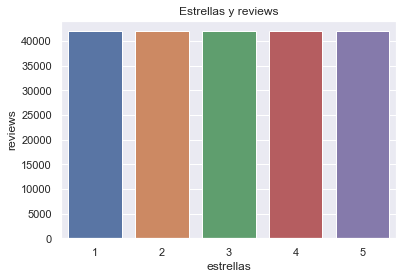

In [21]:
sns.countplot(data=data,x='stars',orient="h")
plt.title("Estrellas y reviews")
plt.xlabel("estrellas")
plt.ylabel("reviews")
plt.show()

**Revisemos la distribucion en porcentaje de las estrellas**

<function matplotlib.pyplot.show(close=None, block=None)>

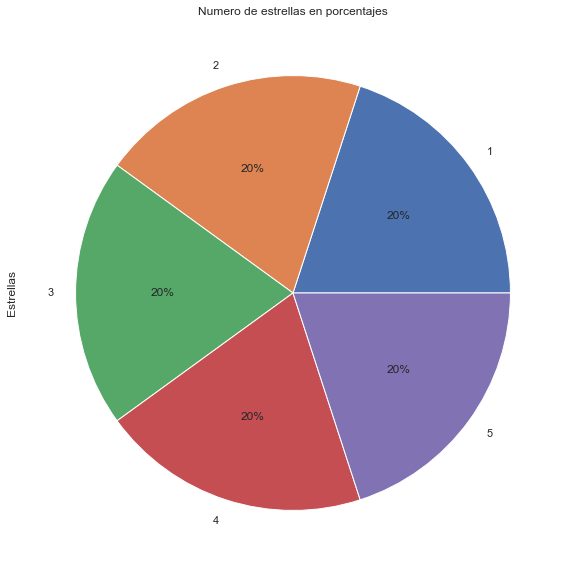

In [22]:
plt.figure(figsize=(10,10))
data.stars.value_counts().plot(kind="pie", autopct='%1.0f%%')
plt.ylabel("Estrellas")
plt.title("Numero de estrellas en porcentajes")
plt.show

**Promedio de estrellas por producto**

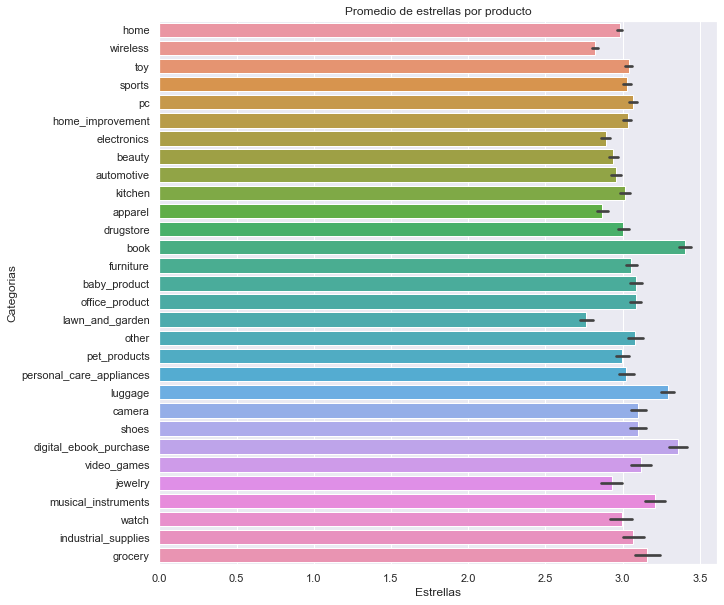

In [23]:
plt.figure(figsize=(10,10))
sns.barplot(x='stars', y='product_category' ,
            data=data,
            order = data.product_category.value_counts().index)

plt.ylabel("Categorias")
plt.xlabel("Estrellas")
plt.title("Promedio de estrellas por producto")
plt.show()

**Analicemos la cantidad segun producto**

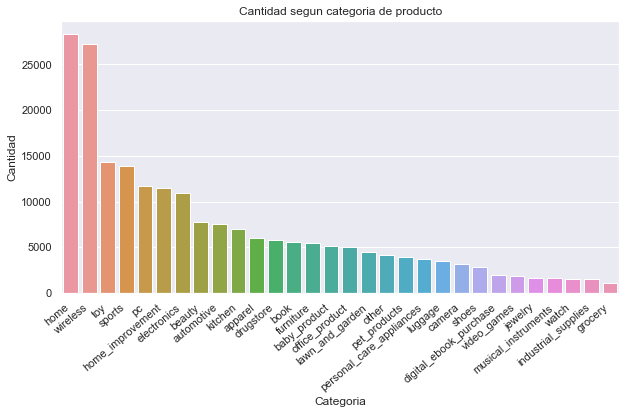

In [24]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data = data, x = "product_category",
                   order = data.product_category.value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")
plt.ylabel("Cantidad")
plt.xlabel("Categoria")
plt.title("Cantidad segun categoria de producto")
plt.show()

**Revisemos la participacion de producto segun su porcentaje**

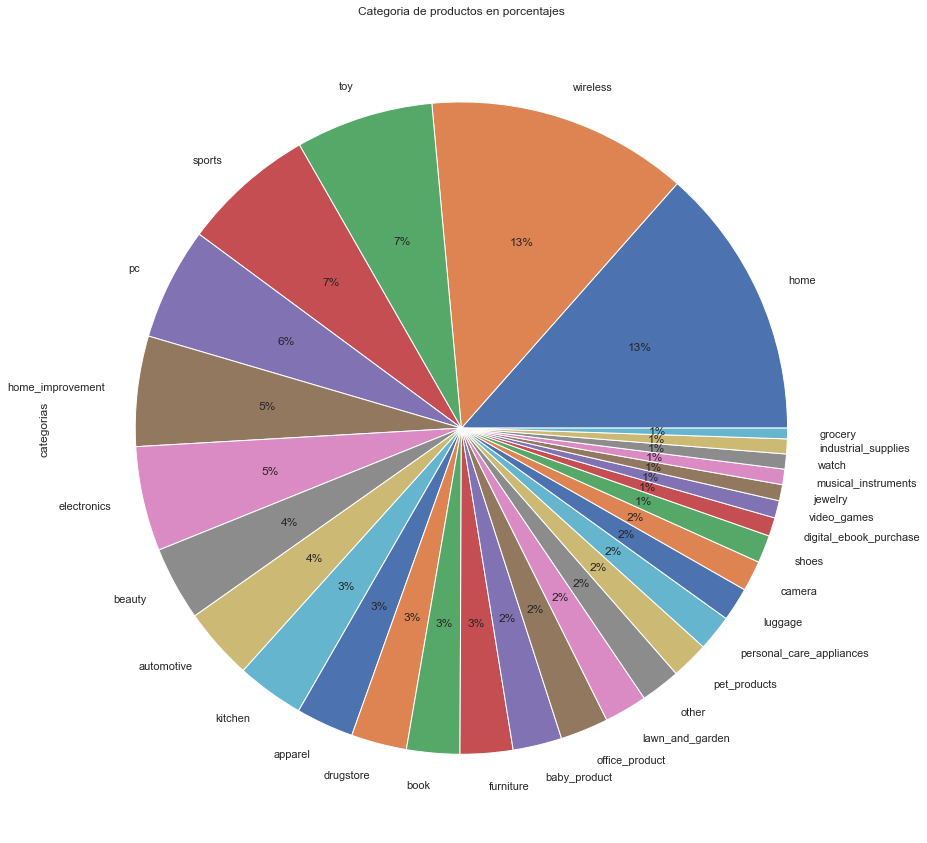

In [25]:
plt.figure(figsize=(22,15))
data.product_category.value_counts().plot(kind="pie", autopct='%1.0f%%')
plt.ylabel("categorias")
plt.title("Categoria de productos en porcentajes")
plt.show()

In [26]:
data.language.unique()

array(['es'], dtype=object)

In [27]:
len(data.reviewer_id.unique())

187140

**Analiis usuario individual**

In [28]:
per_user=data["reviewer_id"].value_counts()
per_user

reviewer_es_0431022    7
reviewer_es_0588051    7
reviewer_es_0437514    7
reviewer_es_0337432    6
reviewer_es_0691152    6
                      ..
reviewer_es_0272223    1
reviewer_es_0802521    1
reviewer_es_0471889    1
reviewer_es_0673019    1
reviewer_es_0452938    1
Name: reviewer_id, Length: 187140, dtype: int64

In [29]:
user_unique=data[data.reviewer_id == "reviewer_es_0588051" ]
user_unique

review_id          product_id          reviewer_id  stars  \
82233   es_0673224  product_es_0616815  reviewer_es_0588051      3   
84353   es_0188523  product_es_0145354  reviewer_es_0588051      3   
87843   es_0254703  product_es_0420214  reviewer_es_0588051      3   
113208  es_0535895  product_es_0481160  reviewer_es_0588051      3   
117067  es_0846764  product_es_0651420  reviewer_es_0588051      3   
131219  es_0999442  product_es_0740672  reviewer_es_0588051      4   
154756  es_0051525  product_es_0258519  reviewer_es_0588051      4   

                                              review_body  \
82233   Generó super fino, se notan mucho las costuras...   
84353   Me gusto mucho el tacto , pero el género hacía...   
87843   La idea y el producto yo se ve de calidad , pe...   
113208  Calidad muy buena, pero las tallas no están mu...   
117067  Es un poco recio, y le pica el cuello a mi hij...   
131219  Parecía que quedaban bien los cristales, pero ...   
154756                    Va muy bien , cómodo y discreto   

                   review_title language product_category  
82233           No me la quede.       es           sports  
84353         Calidad mediocre.       es           sports  
87843                Buena cosa       es           sports  
113208  No me fue bien la talla       es     pet_products  
117067                   Normal       es           sports  
131219            Bastante bien       es          kitchen  
154756                Fenomenal       es          apparel

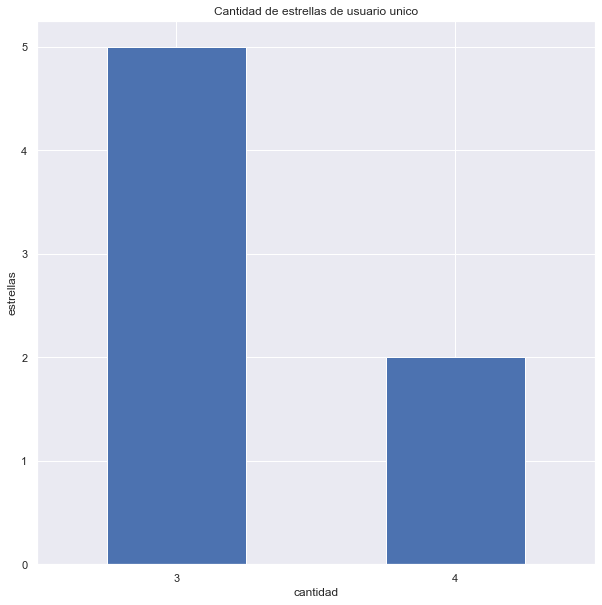

In [30]:
plt.figure(figsize=(10,10))
user_unique.stars.value_counts().plot(kind="bar")
plt.ylabel("estrellas")
plt.xlabel("cantidad")
plt.xticks(rotation=0)
plt.title("Cantidad de estrellas de usuario unico")
plt.show()

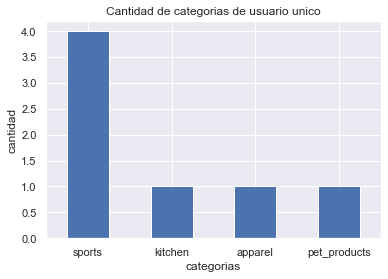

In [32]:
user_unique.product_category.value_counts().plot(kind="bar")
plt.ylabel("cantidad")
plt.xlabel("categorias")
plt.xticks(rotation=0)
plt.title("Cantidad de categorias de usuario unico")
plt.show()

In [33]:
list(user_unique['review_body'])[:5]

['Generó super fino, se notan mucho las costuras y no le fue bien, pero es bonita.',
 'Me gusto mucho el tacto , pero el género hacía bolas en una semana de uso.',
 'La idea y el producto yo se ve de calidad , pero en el envío me llego mal, la tapa no encajaba y así no se puede usar, porque una vez abierto se seca el resto .',
 'Calidad muy buena, pero las tallas no están muy bien . De una a otra es mucha la diferencia.',
 'Es un poco recio, y le pica el cuello a mi hijo ., no me lo quede.']

# Procesamiento de datos

**Columnas de un solo valor**

In [55]:
for i in range(data.shape[1]):
    print(i,len(pd.unique(data.iloc[:,i])))

0 210000
1 156458
2 187140
3 5
4 208127
5 117156
6 1
7 30


**Columnas con pocos valores**

In [56]:
for i in range(data.shape[1]):
    num=len(pd.unique(data.iloc[:,i]))
    porcentaje=float(num)/data.shape[0]*100
    print("%d, %d, %.1f%%"%(i,num,porcentaje))

0, 210000, 100.0%
1, 156458, 74.5%
2, 187140, 89.1%
3, 5, 0.0%
4, 208127, 99.1%
5, 117156, 55.8%
6, 1, 0.0%
7, 30, 0.0%


**Datos duplicados**

In [57]:
duplicado = data.duplicated()
print(duplicado.any())
print(data[duplicado])

False
Empty DataFrame
Columns: [review_id, product_id, reviewer_id, stars, review_body, review_title, language, product_category]
Index: []


**Eliminaciòn de columnas sin valor**

In [58]:
data.head(2)

review_id          product_id          reviewer_id  stars  \
0  es_0417480  product_es_0873923  reviewer_es_0672978      1   
1  es_0180432  product_es_0713146  reviewer_es_0100858      1   

                                         review_body       review_title  \
0  Malisimo, muy grande demasiado aparatoso y mal...        Mala compra   
1          No he recibido el pedido no la devolución  No lo he recibido   

  language product_category  
0       es         wireless  
1       es          apparel

In [59]:
data=data.drop(["review_id","product_id","reviewer_id","language"],axis=1)

In [60]:
data.head(2)

stars                                        review_body  \
0      1  Malisimo, muy grande demasiado aparatoso y mal...   
1      1          No he recibido el pedido no la devolución   

        review_title product_category  
0        Mala compra         wireless  
1  No lo he recibido          apparel

# NLP - Preparacion NLP

In [61]:
nlp = es_core_news_md.load()

**Preparacion de Stopwords**

In [62]:
stopwords_spacy = list(STOP_WORDS)
print(stopwords_spacy)
len(stopwords_spacy)

['para', 'parece', 'quien', 'del', 'bien', 'esos', 'menudo', 'esto', 'añadió', 'buena', 'hacen', 'nadie', 'contigo', 'encima', 'podemos', 'tendrá', 'casi', 'vaya', 'ello', 'asi', 'intentas', 'sabeis', 'intentar', 'sigue', 'además', 'así', 'cinco', 'haceis', 'éstas', 'nuestros', 'general', 'alli', 'hacia', 'mío', 'principalmente', 'pronto', 'propia', 'qué', 'realizar', 'mas', 'claro', 'ademas', 'algunas', 'aquél', 'intento', 'cualquier', 'largo', 'puedo', 'apenas', 'os', 'explicó', 'cuántos', 'hacer', 'actualmente', 'raras', 'ambos', 'siete', 'nosotros', 'trabajan', 'expresó', 'podrían', 'ni', 'ella', 'ningunos', 'si', 'conseguimos', 'aún', 'alguna', 'conmigo', 'por', 'realizó', 'proximo', 'este', 'deprisa', 'empleais', 'sino', 'suyas', 'cuantas', 'al', 'ninguna', 'míos', 'éstos', 'suya', 'última', 'mía', 'supuesto', 'allí', 'sabes', 'sí', 'parte', 'buen', 'usa', 'quizas', 'bastante', 'mí', 'les', 'mal', 'tuvo', 'seis', 'mucha', 'eran', 'dejó', 'adrede', 'lejos', 'yo', 'acuerdo', 'verda

551

In [63]:
nlp = es_core_news_md.load() 
nlp.max_length = 2000000

### *Transformaciones de datos necesarias.*

A) Eliminacion de todas las tildes,salvo la Ñ. Objetivo: reducir errores ortograficos.

B) Realizar una tokenizacion eliminando todo aquello que no sean letras.. Objetivo: Eliminacion de signos o caracteres especiales.

C) Llevar todas las palabras a minuscula. Objetivo: Reducir el trabajo al analizar el texto con palabras que significan lo mismo pero algunas utilizan mayusculas y otras no segun el contexto.

D) Utilizacion de stopwords. Objetivo: eliminar las palabras con poco valor para el analisis.

E) Spellcheck. Objetivo: aplicar correccion ortografica en todo el texto.

F) Spacy. Objetivo: Realizar una tokenizacion.

G) Lemmatizacion. Objetivo: Trabajar con los lemma de cada palabra.

**Eliminacion "review_title"**

In [64]:
revs=[]
for i in range(data.shape[0]):
    review = data.iloc[i].review_title 
    review = re.sub(
        r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", 
        normalize( "NFD", review), 0, re.I
    )
    review=normalize( 'NFC', review)
    revs.append(review)
data["New_R_title"]=pd.Series(revs)

In [65]:
data["New_R_title"]=pd.Series(revs)

**Eliminacion "review_body"**

In [66]:
revs=[]

for i in range(data.shape[0]):
    review = data.iloc[i].review_body
    review = re.sub(
        r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", 
        normalize( "NFD", review), 0, re.I
    )
    review=normalize( 'NFC', review)
    revs.append(review)

In [67]:
data["New_R_body"]=pd.Series(revs)

**Spellchecker**

In [68]:
spell = SpellChecker(language='es',distance=1)

**Tokenizacion, StopWords, Spellcheck y Lemmatizacion en:**

***review_title***

In [69]:
def spell_check(x):
    correct_word = []
    mispelled_word = x
    for word in mispelled_word:
        correct_word.append(spell.correction(word))
    return ' '.join(correct_word)

In [70]:
%%time

regexp=RegexpTokenizer(r"\w+")
tokeandstp=[]
data['New_R_title_Lemm'] = ''

for i in range(data.shape[0]):
    review = data.iloc[i].New_R_title
    review = regexp.tokenize(review)
    review = [word.lower() for word in review if word.lower() not in STOP_WORDS]
    review = spell_check(review)
    review = nlp(review) 
    review = [word.lemma_ for word in review]
    data['New_R_title_Lemm'].iloc[i] = ' '.join(review)

C:\Users\Claud\miniconda3\envs\datascience\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Wall time: 37min 21s


In [71]:
data.drop("New_R_title",axis=1,inplace=True)

**Tokenizacion, StopWords, Spellcheck y Lemmatizacion en:**

***review_body***

In [72]:
def spell_check(x):
    correct_word = []
    mispelled_word = x
    for word in mispelled_word:
        correct_word.append(spell.correction(word))
    return ' '.join(correct_word)

In [73]:
%%time

tokeandstp=[]
regexp=RegexpTokenizer(r"\w+")
data['New_R_body_Lemm'] = ''

for i in range(data.shape[0]):
    review = data.iloc[i].New_R_body
    review = regexp.tokenize(review) 
    review = [word.lower() for word in review if word.lower() not in STOP_WORDS]
    review = spell_check(review)
    review = nlp(review)
    review = [word.lemma_ for word in review]
    data['New_R_body_Lemm'].iloc[i] = ' '.join(review)

Wall time: 37min 30s


In [74]:
data.drop("New_R_body",axis=1,inplace=True)

**Trabajar con Adjetivos**

In [75]:
data.isna().sum()

stars               0
review_body         0
review_title        0
product_category    0
New_R_title_Lemm    0
New_R_body_Lemm     0
dtype: int64

**Debemos eliminar los NA antes de proseguir.**

In [76]:
data = data.dropna(subset=['New_R_title_Lemm',"New_R_body_Lemm"])

**Review_title Adj**

In [77]:
%%time

adjetivos = []

for i in range(data.shape[0]):
    review = data.iloc[i].New_R_title_Lemm
    review = nlp(review)
    review = [word for word in review if word.pos_ == "ADJ"]
    adjetivos.append(review)

Wall time: 21min 40s


In [78]:
data["New_R_title_Lemm_ADJ"] = pd.Series(adjetivos)

**Review_Body Adj** 

In [79]:
%%time


adjetivos = []

for i in range(data.shape[0]):
    review = data.iloc[i].New_R_body_Lemm
    review = nlp(review)
    review = [word for word in review if word.pos_ == "ADJ"]
    adjetivos.append(review)

Wall time: 7h 2min 7s


In [80]:
data["New_R_body_Lemm_ADJ"] = pd.Series(adjetivos)

**Analisis Adjetivos**

***Review_title***

In [81]:
dfstar1 = data[data.stars == 1]
dfstar2 = data[data.stars == 2]
dfstar3 = data[data.stars == 3]
dfstar4 = data[data.stars == 4]
dfstar5 = data[data.stars == 5]

**1 Estrella**

In [82]:
dfstar1 = dfstar1.dropna(subset=["New_R_title_Lemm_ADJ"])
dfstar1['New_R_title_Lemm_ADJ']=dfstar1['New_R_title_Lemm_ADJ'].apply(str)

In [83]:
star1 = []
regexp=RegexpTokenizer(r"\w+")

for i in range(dfstar1.shape[0]):
    x = dfstar1.iloc[i].New_R_title_Lemm_ADJ
    x = regexp.tokenize(x) 
    x = [t for t in x if len(t)>1] 
    star1.append(x)

In [84]:
words_star1=[line for line in star1 for line in set(line)]
words_star1 = Counter(words_star1)
words_star1 = words_star1.most_common(20)
words_star1=pd.DataFrame(words_star1,columns = ['Words', 'Frequency'])
words_star1.head(10)

Words  Frequency
0           malo       2301
1       perfecto        552
2         bonito        534
3        pequeño        525
4   recomendable        516
5     defectuoso        383
6          fatal        340
7       correcto        278
8  decepcionante        248
9           util        226

**2 Estrellas**

In [85]:
dfstar2.head()

stars                                        review_body  \
1000      2  Me han enviado algo completamente diferente. E...   
1001      2  En menos de 2 semanas de uso una de las mangas...   
1002      2  Hicimos el pedido de la barrera, hasta ahí tod...   
1003      2  Queda grande no es una S pero se puede arregla...   
1004      2  En 5 días de uso se ha roto el pulsador de pue...   

                                           review_title  product_category  \
1000                                            Muy mal              home   
1001                           Baja calidad de producto           kitchen   
1002  Decepcionados con el embalaje y el estado del ...      baby_product   
1003                                        Mas o menos           apparel   
1004                                       Poca calidad  home_improvement   

                          New_R_title_Lemm  \
1000                                         
1001                 bajo calidad producto   
1002  decepcionar embalaje y ser articular   
1003                                     o   
1004                               calidad   

                                        New_R_body_Lemm New_R_title_Lemm_ADJ  \
1000  enviar completamente a diferenciar foto y medi...                   []   
1001  2 semana mangar rotar y po enganchar sno costu...                   []   
1002  hacer pedir barrera llegar imagenes caja fatal...                   []   
1003               quedo grande segundo arreglar gracia                   []   
1004  5 rotar pulsador poner marchar y correar inten...                   []   

                                    New_R_body_Lemm_ADJ  
1000                                                 []  
1001                                                 []  
1002  [fatal, mayuscula, etiquetar, completo, amazon...  
1003                                  [grande, segundo]  
1004                                                 []

In [86]:
dfstar2 = dfstar2.dropna(subset=["New_R_title_Lemm_ADJ"])
dfstar2['New_R_title_Lemm_ADJ']=dfstar2['New_R_title_Lemm_ADJ'].apply(str)

In [87]:
star2 = []
regexp=RegexpTokenizer(r"\w+")

for i in range(dfstar2.shape[0]):
    x = dfstar2.iloc[i].New_R_title_Lemm_ADJ
    x = regexp.tokenize(x) 
    x = [t for t in x if len(t)>1] 
    star2.append(x)

In [88]:
words_star2=[line for line in star2 for line in set(line)]
words_star2 = Counter(words_star2)
words_star2 = words_star2.most_common(20)
words_star2=pd.DataFrame(words_star2,columns = ['Words', 'Frequency'])
words_star2.head(10)

Words  Frequency
0           malo       2722
1        pequeño        877
2     defectuoso        423
3           caro        356
4   recomendable        342
5         bonito        338
6          fatal        318
7  decepcionante        315
8         barato        217
9         pesima        209

***3 estrellas***

In [89]:
dfstar3 = dfstar3.dropna(subset=["New_R_title_Lemm_ADJ"])
dfstar3['New_R_title_Lemm_ADJ']=dfstar3['New_R_title_Lemm_ADJ'].apply(str)

In [90]:
star3 = []
regexp=RegexpTokenizer(r"\w+")

for i in range(dfstar3.shape[0]):
    x = dfstar3.iloc[i].New_R_title_Lemm_ADJ
    x = regexp.tokenize(x) 
    x = [t for t in x if len(t)>1] 
    star3.append(x)

In [91]:
words_star3=[line for line in star3 for line in set(line)]
words_star3 = Counter(words_star3)
words_star3 = words_star3.most_common(20)
words_star3=pd.DataFrame(words_star3,columns = ['Words', 'Frequency'])
words_star3.head(10)

Words  Frequency
0       malo       1226
1    pequeño       1176
2     bonito        789
3   correcto        574
4       caro        458
5  aceptable        337
6  mejorable        308
7     grande        299
8     normal        293
9       util        255

**4 Estrellas**

In [92]:
dfstar4 = dfstar4.dropna(subset=["New_R_title_Lemm_ADJ"])
dfstar4['New_R_title_Lemm_ADJ']=dfstar4['New_R_title_Lemm_ADJ'].apply(str)

In [93]:
star4 = []
regexp=RegexpTokenizer(r"\w+")

for i in range(dfstar4.shape[0]):
    x = dfstar4.iloc[i].New_R_title_Lemm_ADJ
    x = regexp.tokenize(x) 
    x = [t for t in x if len(t)>1] 
    star4.append(x)

In [94]:
words_star4=[line for line in star4 for line in set(line)]
words_star4 = Counter(words_star4)
words_star4 = words_star4.most_common(20)
words_star4=pd.DataFrame(words_star4,columns = ['Words', 'Frequency'])
words_star4.head(10)

Words  Frequency
0        bonito       1214
1      correcto       1050
2      perfecto        967
3       pequeño        764
4          util        470
5     aceptable        413
6  recomendable        375
7        genial        306
8          caro        302
9        grande        294

**5 Estrellas**

In [95]:
dfstar5 = dfstar5.dropna(subset=["New_R_title_Lemm_ADJ"])
dfstar5['New_R_title_Lemm_ADJ']=dfstar5['New_R_title_Lemm_ADJ'].apply(str)

In [96]:
star5 = []
regexp=RegexpTokenizer(r"\w+")

for i in range(dfstar5.shape[0]):
    x = dfstar5.iloc[i].New_R_title_Lemm_ADJ
    x = regexp.tokenize(x) 
    x = [t for t in x if len(t)>1] 
    star5.append(x)

In [97]:
words_star5=[line for line in star5 for line in set(line)]
words_star5 = Counter(words_star5)
words_star5 = words_star5.most_common(20)
words_star5=pd.DataFrame(words_star5,columns = ['Words', 'Frequency'])
words_star5.head(10)

Words  Frequency
0      perfecto       2824
1        bonito       1224
2        genial        994
3      correcto        840
4  recomendable        774
5     excelente        763
6          util        597
7        comodo        326
8       pequeño        325
9         ideal        306

## Mejorando la Visualizacion

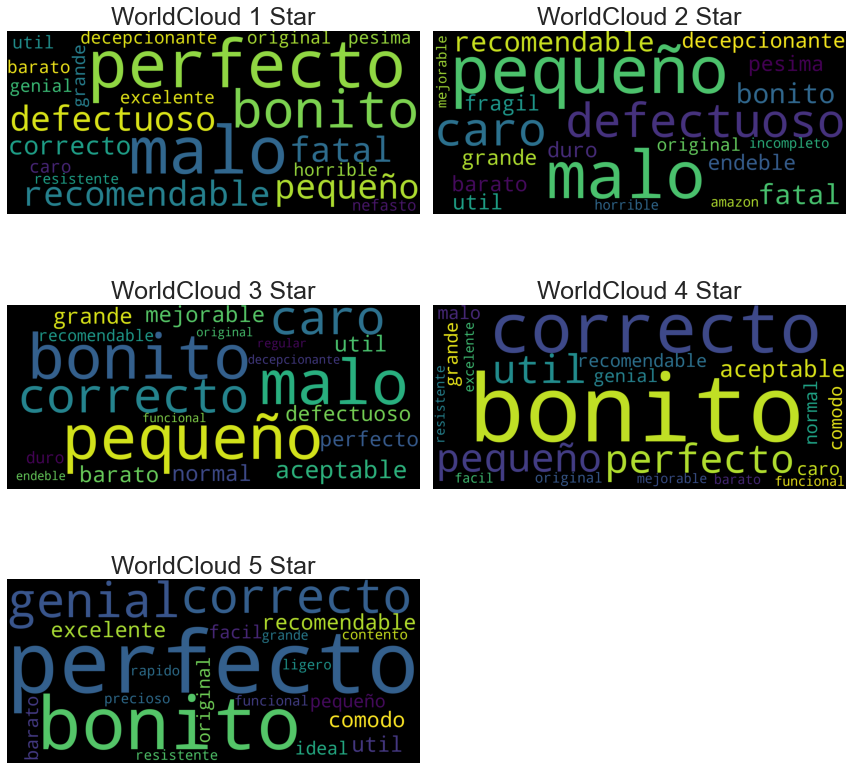

In [98]:
plt.figure(figsize=(12,12))

plt.subplot(321)
estrella1=(" ").join(words_star1["Words"])
wc = WordCloud(max_words = 20, width = 1800 , height = 800 ).generate(estrella1)
plt.imshow(wc)
plt.axis("off")
plt.title('WorldCloud 1 Star', fontsize=25)

plt.subplot(322)
estrella2=(" ").join(words_star2["Words"])
wc = WordCloud(max_words = 20, width = 1800 , height = 800).generate(estrella2)
plt.imshow(wc)
plt.axis("off")
plt.title('WorldCloud 2 Star', fontsize=25)

plt.subplot(323)
estrella3=(" ").join(words_star3["Words"])
wc = WordCloud(max_words = 20, width = 1800 , height = 800).generate(estrella3)
plt.imshow(wc)
plt.axis("off")
plt.title('WorldCloud 3 Star', fontsize=25)

plt.subplot(324)
estrella4=(" ").join(words_star4["Words"])
wc = WordCloud(max_words = 20, width = 1800 , height = 800).generate(estrella4)
plt.imshow(wc)
plt.axis("off")
plt.title('WorldCloud 4 Star', fontsize=25)

plt.subplot(325)
estrella5=(" ").join(words_star5["Words"])
wc = WordCloud(max_words = 20, width = 1800 , height = 800).generate(estrella5)
plt.imshow(wc)
plt.axis("off")
plt.title('WorldCloud 5 Star', fontsize=25)

plt.tight_layout()
plt.show()

**Review_Body**

**1 Estrella**

In [99]:
dfstar1 = dfstar1.dropna(subset=["New_R_body_Lemm_ADJ"])
dfstar1['New_R_body_Lemm_ADJ']=dfstar1['New_R_body_Lemm_ADJ'].apply(str)

In [100]:
star1 = []
regexp=RegexpTokenizer(r"\w+")

for i in range(dfstar1.shape[0]):
    x = dfstar1.iloc[i].New_R_body_Lemm_ADJ
    x = regexp.tokenize(x) 
    x = [t for t in x if len(t)>1] 
    star1.append(x) 

In [101]:
words_star1=[line for line in star1 for line in set(line)]
words_star1 = Counter(words_star1)
words_star1 = words_star1.most_common(20)
words_star1=pd.DataFrame(words_star1,columns = ['Words', 'Frequency'])
words_star1.head(10)

Words  Frequency
0          malo       2728
1       pequeño       2154
2      perfecto       1423
3        bonito       1313
4        amazon       1141
5          caro        954
6        grande        879
7      original        782
8         facil        741
9  recomendable        631

**2 Estrellas**

In [102]:
dfstar2 = dfstar2.dropna(subset=["New_R_body_Lemm_ADJ"])
dfstar2['New_R_body_Lemm_ADJ']=dfstar2['New_R_body_Lemm_ADJ'].apply(str)

In [103]:
star2 = []
regexp=RegexpTokenizer(r"\w+")

for i in range(dfstar2.shape[0]):
    x = dfstar2.iloc[i].New_R_body_Lemm_ADJ
    x = regexp.tokenize(x) 
    x = [t for t in x if len(t)>1] 
    star2.append(x)

In [104]:
words_star2=[line for line in star2 for line in set(line)]
words_star2 = Counter(words_star2)
words_star2 = words_star2.most_common(20)
words_star2=pd.DataFrame(words_star2,columns = ['Words', 'Frequency'])
words_star2.head(10)

Words  Frequency
0      malo       3187
1   pequeño       2485
2    bonito       1327
3    amazon       1097
4      caro       1024
5    grande        897
6    barato        700
7  original        699
8  perfecto        619
9  plastico        587

**3 Estrellas**

In [105]:
dfstar3 = dfstar3.dropna(subset=["New_R_body_Lemm_ADJ"])
dfstar3['New_R_body_Lemm_ADJ']=dfstar3['New_R_body_Lemm_ADJ'].apply(str)

In [106]:
star3 = []
regexp=RegexpTokenizer(r"\w+")

for i in range(dfstar3.shape[0]):
    x = dfstar3.iloc[i].New_R_body_Lemm_ADJ
    x = regexp.tokenize(x) 
    x = [t for t in x if len(t)>1] 
    star3.append(x)

In [107]:
words_star3=[line for line in star3 for line in set(line)]
words_star3 = Counter(words_star3)
words_star3 = words_star3.most_common(20)
words_star3=pd.DataFrame(words_star3,columns = ['Words', 'Frequency'])
words_star3.head(10)

Words  Frequency
0   pequeño       3347
1    bonito       2111
2      malo       1961
3    grande       1382
4  perfecto       1229
5      caro       1200
6  correcto        938
7     facil        842
8  original        807
9    normal        746

**4 Estrellas**

In [108]:
dfstar4 = dfstar4.dropna(subset=["New_R_body_Lemm_ADJ"])
dfstar4['New_R_body_Lemm_ADJ']=dfstar4['New_R_body_Lemm_ADJ'].apply(str)

In [109]:
star4 = []
regexp=RegexpTokenizer(r"\w+")

for i in range(dfstar4.shape[0]):
    x = dfstar4.iloc[i].New_R_body_Lemm_ADJ
    x = regexp.tokenize(x) 
    x = [t for t in x if len(t)>1] 
    star4.append(x)

In [110]:
words_star4=[line for line in star4 for line in set(line)]
words_star4 = Counter(words_star4)
words_star4 = words_star4.most_common(20)
words_star4=pd.DataFrame(words_star4,columns = ['Words', 'Frequency'])
words_star4.head(10)

Words  Frequency
0   pequeño       2922
1  perfecto       2570
2    bonito       2450
3     facil       1557
4    grande       1519
5  correcto       1336
6      malo        999
7    genial        971
8      caro        969
9  original        944

**5 Estrellas**

In [111]:
dfstar5 = dfstar5.dropna(subset=["New_R_body_Lemm_ADJ"])
dfstar5['New_R_body_Lemm_ADJ']=dfstar5['New_R_body_Lemm_ADJ'].apply(str)

In [112]:
star5 = []
regexp=RegexpTokenizer(r"\w+")

for i in range(dfstar5.shape[0]):
    x = dfstar5.iloc[i].New_R_body_Lemm_ADJ
    x = regexp.tokenize(x) 
    x = [t for t in x if len(t)>1] 
    star5.append(x)

In [113]:
words_star5=[line for line in star5 for line in set(line)]
words_star5 = Counter(words_star5)
words_star5 = words_star5.most_common(20)
words_star5=pd.DataFrame(words_star5,columns = ['Words', 'Frequency'])
words_star5.head(10)

Words  Frequency
0      perfecto       5191
1        bonito       2561
2         facil       2319
3       pequeño       2105
4        genial       1941
5  recomendable       1578
6        rapido       1279
7        grande       1188
8      correcto       1148
9        comodo       1049

## Mejorando la Visualizacion.

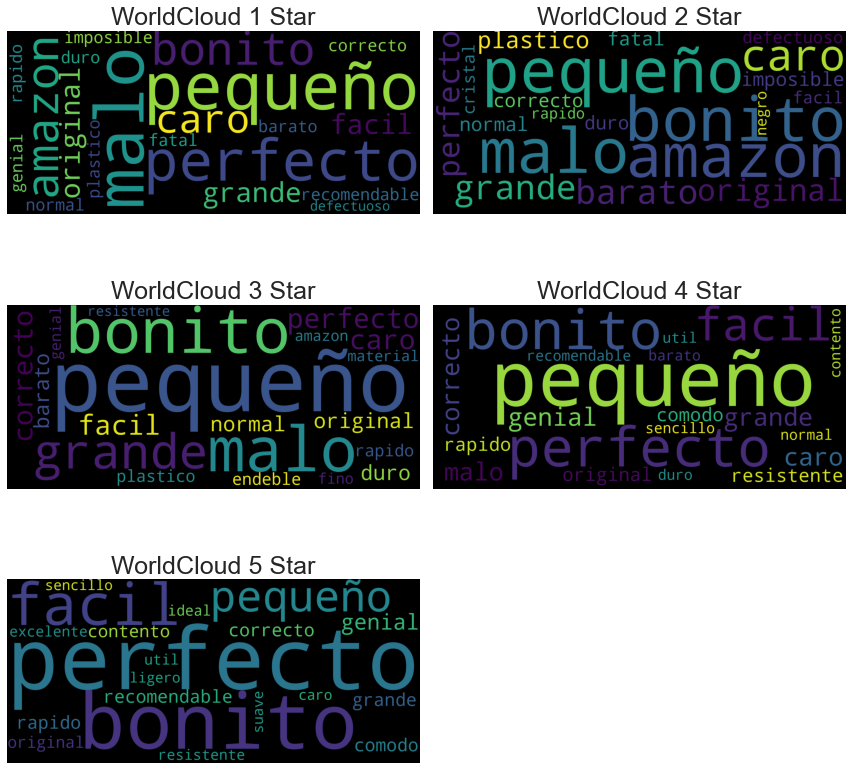

In [114]:
plt.figure(figsize=(12,12))

plt.subplot(321)
estrella1=(" ").join(words_star1["Words"])
wc = WordCloud(max_words = 20, width = 1800 , height = 800 ).generate(estrella1)
plt.imshow(wc)
plt.axis("off")
plt.title('WorldCloud 1 Star', fontsize=25)

plt.subplot(322)
estrella2=(" ").join(words_star2["Words"])
wc = WordCloud(max_words = 20, width = 1800 , height = 800).generate(estrella2)
plt.imshow(wc)
plt.axis("off")
plt.title('WorldCloud 2 Star', fontsize=25)

plt.subplot(323)
estrella3=(" ").join(words_star3["Words"])
wc = WordCloud(max_words = 20, width = 1800 , height = 800).generate(estrella3)
plt.imshow(wc)
plt.axis("off")
plt.title('WorldCloud 3 Star', fontsize=25)

plt.subplot(324)
estrella4=(" ").join(words_star4["Words"])
wc = WordCloud(max_words = 20, width = 1800 , height = 800).generate(estrella4)
plt.imshow(wc)
plt.axis("off")
plt.title('WorldCloud 4 Star', fontsize=25)

plt.subplot(325)
estrella5=(" ").join(words_star5["Words"])
wc = WordCloud(max_words = 20, width = 1800 , height = 800).generate(estrella5)
plt.imshow(wc)
plt.axis("off")
plt.title('WorldCloud 5 Star', fontsize=25)

plt.tight_layout()
plt.show()

## Análisis de Sentimientos

### Clasificación de stars

Las críticas positivas se clasificarán como +1 y las críticas negativas se clasificarán como -1.

Clasificaremos todas las reseñas con 'Puntuación'  > 3 como +1, lo que indica que son positivas.

Todas las reseñas con 'Puntuación' < 3 se clasificarán como -1 siendo las negativas y las reseñas con 'Puntuación' = 3 se eliminarán porque son neutrales. 

De esta manera nuestro modelo solo clasificará reseñas positivas y negativas.

In [117]:
data = data[data['stars'] != 3]
data['sentiment'] = data['stars'].apply(lambda rating : +1 if rating > 3 else -1)

In [118]:
data.head()

stars                                        review_body  \
0      1  Malisimo, muy grande demasiado aparatoso y mal...   
1      1          No he recibido el pedido no la devolución   
2      1  Tengo que buscar otro sistema, este no funcion...   
3      1  Utilicé las brocas de menor diámetro y se me d...   
4      1         No me gusta su olor a viejo y aspecto malo   

                         review_title  product_category   New_R_title_Lemm  \
0                         Mala compra          wireless       malo comprar   
1                   No lo he recibido           apparel            recibir   
2  Que no aprieta bien en el manillar            sports   apretar manillar   
3               Brocas de mantequilla  home_improvement  broca mantequilla   
4                         No me gusta            beauty             gustar   

                                     New_R_body_Lemm New_R_title_Lemm_ADJ  \
0     malisimo grande aparatoso y protector pantalla               [malo]   
1                           recibir pedir devolución                   []   
2  buscar sistema funcionar abrazadera agarrar ma...                   []   
3  utilizar broca menor diametro y doblar ser man...                   []   
4                 gustar olor a viejo y aspecto malo                   []   

                         New_R_body_Lemm_ADJ  sentiment  
0                                   [grande]         -1  
1                                         []         -1  
2                                   [abajar]         -1  
3  [menor, minima, amarillo, interior, gris]         -1  
4                              [viejo, malo]         -1

**Ahora que hemos elaborado nuestra clasificación en positivos y negativos, vamos a construir nubes con las palabras de cada sentimiento**

In [119]:
positive = data[data['sentiment'] == 1]
negative = data[data['sentiment'] == -1]

**Vamos a visualizar**

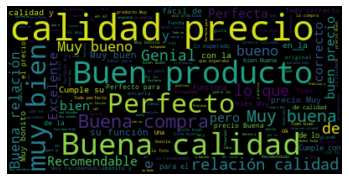

In [125]:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href","good","great"])
## good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive.review_title)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

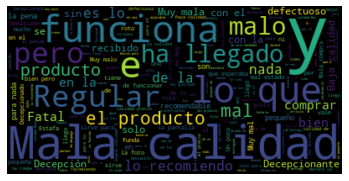

In [126]:
neg = " ".join(review for review in negative.review_title)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

La nube de palabras de sentimiento negativo se llenó en su mayoría de palabras negativas, como " malo", "decepcionante", mala calidad" y por el contrario la nube de sentimientos positivos tiene palabras como: "perfecto", "muy bueno", "genial".

Por último, podemos echar un vistazo a la distribución de opiniones con sentimiento en todo el conjunto de datos:

In [132]:
data['sentimentt'] = data['sentiment'].replace({-1 : 'negative'})
data['sentimentt'] = data['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(data, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

**De acuerdo a nuestro histograma lasm criticas a los productos se encuentyran divididos exactamente igual, lo que es logico porque las estrellas teniana cada una la participacion de 20%**

***Limpieza de datos***

In [135]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
data['review_body'] = data['review_body'].apply(remove_punctuation)
data = data.dropna(subset=['review_title'])
data['review_title'] = data['review_title'].apply(remove_punctuation)

El nuevo marco de datos solo debe tener dos columnas: " review_title " (los datos del texto de revisión) y " sentimiento " (la variable de destino).

In [172]:
df = data[['review_title','sentiment']]
df.head()

review_title  sentiment
0                         Mala compra         -1
1                   No lo he recibido         -1
2  Que no aprieta bien en el manillar         -1
3               Brocas de mantequilla         -1
4                         No me gusta         -1

In [173]:
# random split train and test data
index = data.index
data['random_number'] = np.random.randn(len(index))
train = data[data['random_number'] <= 0.8]
test = data[data['random_number'] > 0.8]

In [174]:
# count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['review_title'])
test_matrix = vectorizer.transform(test['review_title'])

In [175]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [176]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [177]:
lr.fit(X_train,y_train)

C:\Users\Claud\miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [178]:
predictions = lr.predict(X_test)


**¡Ahora podemos probar la precisión de nuestro modelo!**

In [179]:
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[15593,  1978],
       [ 2439, 15958]], dtype=int64)

In [180]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.86      0.89      0.88     17571
           1       0.89      0.87      0.88     18397

    accuracy                           0.88     35968
   macro avg       0.88      0.88      0.88     35968
weighted avg       0.88      0.88      0.88     35968



**La precisión general del modelo en los datos de prueba es de alrededor del 88%, lo cual es bastante bueno considerando que no hicimos ninguna extracción de características ni tanto preprocesamiento como es otros modelos**

### Aprovecho este último informe para agradecer todos los conocimientos que aportaron para mi carrera y desarrollo profesional.

## ¡Gracias!

